# Exercise 4.10 Coding Etiquette & Excel Reporting

## PART 1

01. Importing Libraries and data sets
02. Security implications - Looking for Personally identifiable information (PII) data
03. Comparing customer behaviour in different geographic areas
04. Identifying and excluding low-activity customers
05. Excluding outliers from the prices column
06. Customer Grouping based on Age
07. Customer Grouping based on income
08. Customer Grouping based on Number of dependents
09. Assessing the popularity of products
10. Customers' Brand loyalty
11. Ordering habits based on a customer's loyalty status
12. Ordering habits based on a customer's region
13. Creating Customer Profiles based on age and marital status
14. Ordering habits based on a customer's age and marital status
15. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
16. Comparison of customer profiles with regions and departments

### 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path_name = r'/Users/geetika/Documents/Python/Instacart Basket Analysis'

In [3]:
# Importing the data set
ords_prods_all = pd.read_pickle(os.path.join(path_name, '02_Data', 'Prepared Data', 'ords_prods_custs_merge.pkl'))

In [4]:
# Display all columns
pd.options.display.max_columns = None

In [5]:
ords_prods_all.shape

(32434212, 29)

In [6]:
ords_prods_all.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_since_prior_order,Regularity_of_customer,First Name,surname,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


- Price Range grouping

In [7]:
def price_label(row):
    if row['prices'] <= 5:
        return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    elif row['prices'] > 15:
        return 'High range'
    else:
        return 'Not enough data'

In [8]:
ords_prods_all['price_range_loc'] = ords_prods_all.apply(price_label, axis = 1)

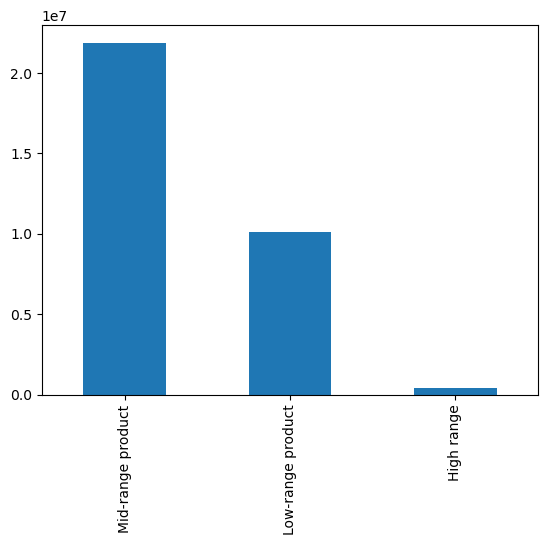

In [73]:
# Creating a bar chart of the simpler price range groupings
prices_bar = ords_prods_all['price_range_loc'].value_counts().plot.bar()

In [77]:
# Exporting the bar chart of the simpler price range groupings
prices_bar.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Price_range_groupings.png'))

- Weekly distribution of sales

In [9]:
ords_prods_all['orders_day_of_week'].value_counts(dropna = False)

0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: orders_day_of_week, dtype: int64

In [10]:
result_days = []

for value in ords_prods_all['orders_day_of_week']:
    if value == 0 or value == 1:
        result_days.append('Busiest days')
    elif value == 3 or value == 4:
        result_days.append('Slowest days')
    else:
        result_days.append('Regular days')

In [11]:
ords_prods_all['busiest_day_2'] = result_days

- Hourly distribution of sales

In [12]:
ords_prods_all['order_hour_of_day'].value_counts(dropna = False)

10    2764390
11    2738585
14    2691563
15    2664522
13    2663272
12    2620800
16    2537469
9     2456661
17    2089452
8     1719952
18    1637922
19    1259382
20     977017
7      891928
21     796362
22     634737
23     402612
6      290770
0      218942
1      115786
5       88057
2       69431
4       53283
3       51317
Name: order_hour_of_day, dtype: int64

In [13]:
result_hours = []

for hour in ords_prods_all['order_hour_of_day']:
    if hour == 10 or hour == 11 or hour == 14 or hour == 15 or hour == 13 or hour == 12 or hour == 16 or hour == 9:
        result_hours.append('Busiest hours')
    elif hour == 17 or hour == 8 or hour == 18 or hour == 19 or hour == 20 or hour == 7 or hour == 21 or hour == 22:
        result_hours.append('Regular hours')
    else:
        result_hours.append('Slowest hours')

In [14]:
ords_prods_all['busiest_hour'] = result_hours

In [15]:
ords_prods_all['busiest_hour'].value_counts(dropna = False)

Busiest hours    21137262
Regular hours    10006752
Slowest hours     1290198
Name: busiest_hour, dtype: int64

In [16]:
ords_prods_all.shape

(32434212, 32)

In [17]:
ords_prods_all.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_since_prior_order,Regularity_of_customer,First Name,surname,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge,price_range_loc,busiest_day_2,busiest_hour
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,Mid-range product,Regular days,Regular hours
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,Mid-range product,Slowest days,Regular hours
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,Mid-range product,Slowest days,Busiest hours
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,Mid-range product,Slowest days,Regular hours
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,Mid-range product,Slowest days,Busiest hours


### 02. Security implications - Looking for Personally identifiable information (PII) data

In [18]:
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 32 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       int64         
 1   user_id                        int64         
 2   order_number                   int64         
 3   orders_day_of_week             int64         
 4   order_hour_of_day              int64         
 5   days_since_prior_order         float64       
 6   product_id                     int64         
 7   add_to_cart_order              int64         
 8   reordered                      int64         
 9   product_name                   object        
 10  aisle_id                       int64         
 11  department_id                  int64         
 12  prices                         float64       
 13  max_order                      int64         
 14  loyalty_flag                   object        
 15  mean_price_of

The ords_prods_custs_merge data set has some sensitive information in our data set that could lead to the identification of an individual - First name, surname, state, age, number_of_dependents, marital_status and income. Therfore, we are working with PII. 
In order to comply with European Union's data privacy regulation, GDPR, the columns First name and surname will be dropped.
The colummn '_merge' is unnecessary and might pose problems when merging tables in the future. So, it will also be dropped.

In [19]:
# Dropping columns 'First name' and 'surname'
col_drop = ['First Name', 'surname', '_merge']
ords_prods_all = ords_prods_all.drop(columns = col_drop)

In [20]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_since_prior_order,Regularity_of_customer,gender,state,age,date_joined,number_of_dependents,marital_status,income,price_range_loc,busiest_day_2,busiest_hour
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Regular days,Regular hours
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours


### 03. Comparing customer behaviour in different geographic areas

- Defining regions

In [21]:
region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

- Creating regions

In [22]:
ords_prods_all.loc[ords_prods_all['state'].isin(region_1), 'Region'] = 'Region_1'

In [23]:
ords_prods_all.loc[ords_prods_all['state'].isin(region_2), 'Region'] = 'Region_2'

In [24]:
ords_prods_all.loc[ords_prods_all['state'].isin(region_3), 'Region'] = 'Region_3'

In [25]:
ords_prods_all.loc[ords_prods_all['state'].isin(region_4), 'Region'] = 'Region_4'

In [26]:
# Distribution of customers in the various geographic regions
ords_prods_all['Region'].value_counts()

Region_3    10801610
Region_4     8300445
Region_2     7603810
Region_1     5728347
Name: Region, dtype: int64

In [27]:
# Number of rows in ords_prods_all = 32434212

# Check to see if all states have been grouped into 4 regions
10801610 + 8300445 + 7603810 + 5728347

32434212

In [28]:
crosstab = pd.crosstab(ords_prods_all['Region'], ords_prods_all['spending_flag'], dropna = False)

In [29]:
crosstab.to_clipboard()

Region_3 has the highest number of customers of all the four regions while Region_1 has the least number of customers. The percentages of high spenders and low spenders are the same across all geographic regions. They are 2% and 98% respectively.

### 04. Identifying and excluding low-activity customers

- Creating Exclusion_flag

In [30]:
ords_prods_all.loc[ords_prods_all['max_order'] < 5 , 'Exclusion_flag'] = 'Low-activity customer'

In [31]:
ords_prods_all.loc[ords_prods_all['max_order'] >= 5 , 'Exclusion_flag'] = 'High-activity customer'

In [32]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_since_prior_order,Regularity_of_customer,gender,state,age,date_joined,number_of_dependents,marital_status,income,price_range_loc,busiest_day_2,busiest_hour,Region,Exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Regular days,Regular hours,Region_3,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours,Region_3,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours,Region_3,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours,Region_3,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours,Region_3,High-activity customer


In [33]:
ords_prods_all['Exclusion_flag'].value_counts(dropna = False)

High-activity customer    30992664
Low-activity customer      1441548
Name: Exclusion_flag, dtype: int64

In [34]:
30992664 + 1441548

32434212

In [35]:
# Creating a subset dataframe with low-activity customers
df_low_active = ords_prods_all[ords_prods_all['Exclusion_flag'] == 'Low-activity customer']

In [36]:
df_low_active.shape

# Number of rows matches with the rows in the frequency table

(1441548, 31)

In [37]:
df_low_active.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_since_prior_order,Regularity_of_customer,gender,state,age,date_joined,number_of_dependents,marital_status,income,price_range_loc,busiest_day_2,busiest_hour,Region,Exclusion_flag
1513,520620,120,1,3,11,NaN,196,2,0,Soda,77,7,9.0,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219,Mid-range product,Slowest days,Busiest hours,Region_3,Low-activity customer
1514,3273029,120,3,2,8,19.0,196,2,1,Soda,77,7,9.0,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219,Mid-range product,Regular days,Regular hours,Region_3,Low-activity customer
1515,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,77,7,13.4,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219,Mid-range product,Slowest days,Busiest hours,Region_3,Low-activity customer
1516,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,77,7,13.4,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219,Mid-range product,Regular days,Regular hours,Region_3,Low-activity customer
1517,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,50,19,3.1,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219,Low-range product,Slowest days,Busiest hours,Region_3,Low-activity customer


In [38]:
# Creating a subset dataframe with high-activity customers. This automatically excludes the low-activity customers

ords_prods_high = ords_prods_all[ords_prods_all['Exclusion_flag'] == 'High-activity customer']

In [39]:
ords_prods_high.shape

(30992664, 31)

- Exporting the dataframes

In [40]:
df_low_active.to_pickle(os.path.join(path_name, '02_Data', 'Prepared Data', 'ords_prods_low.pkl'))

In [41]:
ords_prods_high.to_pickle(os.path.join(path_name, '02_Data', 'Prepared Data', 'ords_prods_high.pkl'))

### 05. Excluding outliers from the prices column

In [42]:
ords_prods_high['prices'].describe()

count    3.099266e+07
mean     1.193448e+01
std      4.911216e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [43]:
# Counting the number of rows with price = 99999.0
ords_prods_high.groupby('prices')['prices'].count()

prices
1.0        109262
1.1        232337
1.2        242698
1.3        407143
1.4        374799
            ...  
24.8          386
24.9         5466
25.0        13128
14900.0      4223
99999.0       654
Name: prices, Length: 242, dtype: int64

In [44]:
ords_prods_high2 = ords_prods_high[ords_prods_high['prices'] != 99999.0]

In [45]:
ords_prods_high2['prices'].describe()

count    3.099201e+07
mean     9.824537e+00
std      1.738779e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      1.490000e+04
Name: prices, dtype: float64

In [46]:
ords_prods_high2.shape

(30992010, 31)

In [47]:
30992664 - 654

30992010

In [42]:
#pd.options.display.max_rows = None

In [43]:
#ords_prods_high2.groupby('prices')['prices'].count()

prices
1.0        109262
1.1        232337
1.2        242698
1.3        407143
1.4        374799
1.5        147283
1.6        285334
1.7        204633
1.8        307565
1.9        148640
2.0        274043
2.1        197052
2.2        152926
2.3        230841
2.4        187608
2.5        236154
2.6        202300
2.7        190904
2.8        146494
2.9        252620
3.0        183364
3.1        239162
3.2        242552
3.3        227350
3.4        213134
3.5        212944
3.6        287622
3.7        211593
3.8        301585
3.9        203334
4.0        429903
4.1        257151
4.2        235121
4.3        154892
4.4        342079
4.5        349635
4.6        137148
4.7        211874
4.8        184349
4.9        303699
5.0        215773
5.1        214743
5.2        240609
5.3        271660
5.4        197232
5.5        238402
5.6        175373
5.7        310287
5.8        230339
5.9        199986
6.0        187677
6.1        232840
6.2        170918
6.3        418555
6.4        197481
6.5

In [48]:
columns_info = ['age', 'income', 'number_of_dependents']
ords_prods_high2[columns_info].describe()
#ords_prods_high['department_id'].describe()

,age,income,number_of_dependents
count,3.099201e+07,3.099201e+07,3.099201e+07
mean,4.946795e+01,9.967072e+04,1.501799e+00
std,1.848520e+01,4.313370e+04,1.118902e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.728900e+04,1.000000e+00
50%,4.900000e+01,9.676400e+04,2.000000e+00
75%,6.500000e+01,1.280990e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


The above table contains the summary statistics of three variables - age, income and number_of_dependents. Using this information, the grouping criteria for customers for each of these variables is decided.

Age:
The minimum age of a customer is 18 and the maximum is 81. Tweaking the values of the 25th and the 75th quartiles, the customers have been grouped into 3 age groups.
Young Adults are less than 35 years old.
Middle aged are between 36 an 60 (both inclusive).
Senior citizens are older than 60.

Income:
The minimum income of a customer is 25,903 USD and the maximum income is 593,901 USD. There is a huge difference between these two values whereas 75% of the customers earn lower than 128,099 USD. To accurately capture this very broad range, the customers have been grouped into 4 categories based on income.
Low income, when income <= 70,000 USD.
Moderate income, when 70,000 USD < income <= 10,000 USD.
High income, when 100,000 USD < income <= 130,000 USD.
Ultra high income, when income > 130,000 USD.

Number of dependents:
The minimum number of dependents is '0' while the maximum is '3'. The grouping based on number of dependents is binary; either "No dependents" for value '0' and "Has dependents" for values greater than '0'.

### 06. Customer Grouping based on Age

In [49]:
def age_label(row):
    if row['age'] <= 35:
        return 'Young Adults'
    elif (row['age'] > 35) and (row['age'] <= 60):
        return 'Middle aged'
    elif row['age'] > 60:
        return 'Senior citizens'
    else: return 'Not enough data'

In [50]:
ords_prods_high2['age_group'] = ords_prods_high2.apply(age_label, axis = 1)

/var/folders/7w/cp4_h97s3bd3qx9ww9ss1g_r0000gn/T/ipykernel_6719/4274839133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_high2['age_group'] = ords_prods_high2.apply(age_label, axis = 1)


In [51]:
ords_prods_high2['age_group'].value_counts(dropna = False)

Middle aged        12124009
Senior citizens    10121417
Young Adults        8746584
Name: age_group, dtype: int64

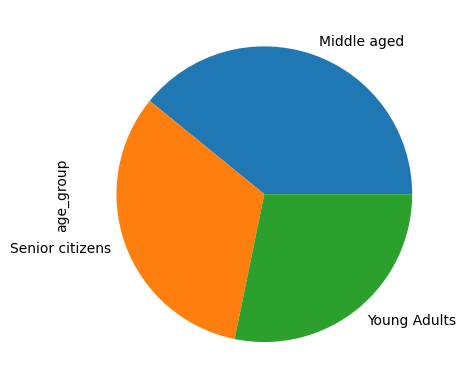

In [120]:
# Creating the pie chart of customers' age group
age_group_pie = ords_prods_high2['age_group'].value_counts().plot.pie()

In [52]:
ords_prods_high2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_since_prior_order,Regularity_of_customer,gender,state,age,date_joined,number_of_dependents,marital_status,income,price_range_loc,busiest_day_2,busiest_hour,Region,Exclusion_flag,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Regular days,Regular hours,Region_3,High-activity customer,Young Adults
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours,Region_3,High-activity customer,Young Adults
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours,Region_3,High-activity customer,Young Adults
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours,Region_3,High-activity customer,Young Adults
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours,Region_3,High-activity customer,Young Adults


In [154]:
# Exporting the pie chart of age group
age_group_pie.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Customer_age_group_pie.png'))

### 07. Customer Grouping based on Income

In [53]:
def income_label(row):
    if row['income'] <= 70000:
        return 'Low income'
    elif (row['income'] > 70000) and (row['income'] <= 100000):
        return 'Moderate income'
    elif (row['income'] > 100000) and (row['income'] <= 130000):
        return 'High income'
    elif row['income'] > 130000:
        return 'Ultra high income'
    else: return 'Not enough data'

In [54]:
ords_prods_high2['income_group'] = ords_prods_high2.apply(income_label, axis = 1)

/var/folders/7w/cp4_h97s3bd3qx9ww9ss1g_r0000gn/T/ipykernel_6719/2765248413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_high2['income_group'] = ords_prods_high2.apply(income_label, axis = 1)


In [55]:
ords_prods_high2['income_group'].value_counts(dropna = False)

Low income           8529003
Moderate income      8244576
Ultra high income    7407298
High income          6811133
Name: income_group, dtype: int64

In [56]:
ords_prods_high2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_since_prior_order,Regularity_of_customer,gender,state,age,date_joined,number_of_dependents,marital_status,income,price_range_loc,busiest_day_2,busiest_hour,Region,Exclusion_flag,age_group,income_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Regular days,Regular hours,Region_3,High-activity customer,Young Adults,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours,Region_3,High-activity customer,Young Adults,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours,Region_3,High-activity customer,Young Adults,Low income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours,Region_3,High-activity customer,Young Adults,Low income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours,Region_3,High-activity customer,Young Adults,Low income


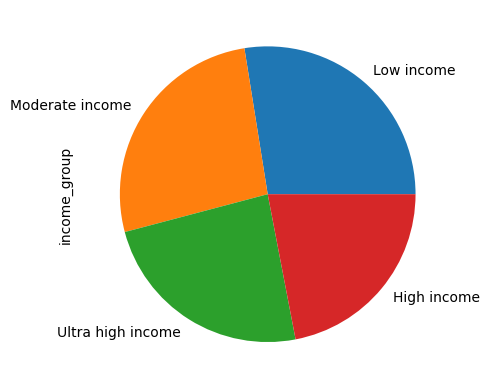

In [124]:
# Creating the pie chart of customers' income grouping
customer_income_pie = ords_prods_high2['income_group'].value_counts().plot.pie()

In [155]:
# Exporting the pie chart of income grouping
customer_income_pie.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Customer_income_group_pie.png'))

### 08. Customer Grouping based on Number of dependents

In [57]:
def dependents_label(row):
    if row['number_of_dependents'] == 0:
        return 'No dependents'
    elif row['age'] > 0:
        return 'Has dependents'
    else: return 'Not enough data'

In [58]:
ords_prods_high2['dependent_status'] = ords_prods_high2.apply(dependents_label, axis = 1)

/var/folders/7w/cp4_h97s3bd3qx9ww9ss1g_r0000gn/T/ipykernel_6719/682257793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_high2['dependent_status'] = ords_prods_high2.apply(dependents_label, axis = 1)


In [59]:
ords_prods_high2['dependent_status'].value_counts(dropna = False)

Has dependents    23245165
No dependents      7746845
Name: dependent_status, dtype: int64

In [60]:
ords_prods_high2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_since_prior_order,Regularity_of_customer,gender,state,age,date_joined,number_of_dependents,marital_status,income,price_range_loc,busiest_day_2,busiest_hour,Region,Exclusion_flag,age_group,income_group,dependent_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Regular days,Regular hours,Region_3,High-activity customer,Young Adults,Low income,Has dependents
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours,Region_3,High-activity customer,Young Adults,Low income,Has dependents
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours,Region_3,High-activity customer,Young Adults,Low income,Has dependents
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours,Region_3,High-activity customer,Young Adults,Low income,Has dependents
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours,Region_3,High-activity customer,Young Adults,Low income,Has dependents


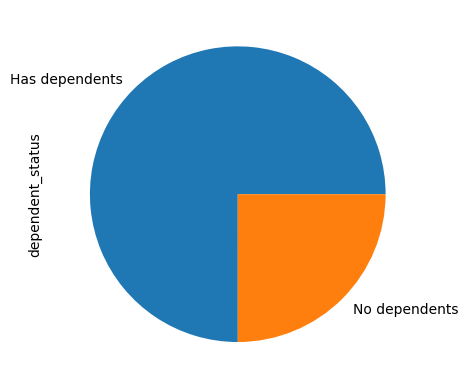

In [125]:
# Creating the pie chart of number of dependents grouping
dependent_status_pie = ords_prods_high2['dependent_status'].value_counts().plot.pie()

In [156]:
# Exporting the pie chart of income grouping
dependent_status_pie.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Customer_dependents_grouping_pie.png'))

### 09. Assessing the popularity of products

- Importing the departments data set
- Merging the departments data set with the ords_prods_high2

In [61]:
# Importing the data set
departments = pd.read_csv(os.path.join(path_name, '02_Data', 'Prepared Data', 'departments_wrangled.csv'))

In [62]:
departments.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [63]:
departments = departments.rename(columns={'Unnamed: 0': 'department_id'})

In [64]:
departments.head(30)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [65]:
# Merging the ords_prods_high2 data set with departments data set
ords_prods_final = ords_prods_high2.merge(departments, on = 'department_id', indicator = True)

In [66]:
ords_prods_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price_of_products,spending_flag,median_days_since_prior_order,Regularity_of_customer,gender,state,age,date_joined,number_of_dependents,marital_status,income,price_range_loc,busiest_day_2,busiest_hour,Region,Exclusion_flag,age_group,income_group,dependent_status,department,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Regular days,Regular hours,Region_3,High-activity customer,Young Adults,Low income,Has dependents,beverages,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours,Region_3,High-activity customer,Young Adults,Low income,Has dependents,beverages,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours,Region_3,High-activity customer,Young Adults,Low income,Has dependents,beverages,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Regular hours,Region_3,High-activity customer,Young Adults,Low income,Has dependents,beverages,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Mid-range product,Slowest days,Busiest hours,Region_3,High-activity customer,Young Adults,Low income,Has dependents,beverages,both


In [67]:
ords_prods_final['_merge'].value_counts()

both          30992010
left_only            0
right_only           0
Name: _merge, dtype: int64

In [68]:
ords_prods_final = ords_prods_final.drop(columns = '_merge')

In [69]:
ords_prods_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30992010 entries, 0 to 30992009
Data columns (total 35 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       int64         
 1   user_id                        int64         
 2   order_number                   int64         
 3   orders_day_of_week             int64         
 4   order_hour_of_day              int64         
 5   days_since_prior_order         float64       
 6   product_id                     int64         
 7   add_to_cart_order              int64         
 8   reordered                      int64         
 9   product_name                   object        
 10  aisle_id                       int64         
 11  department_id                  int64         
 12  prices                         float64       
 13  max_order                      int64         
 14  loyalty_flag                   object        
 15  mean_price_of

In [70]:
ords_prods_final['department'].value_counts()

produce            9079276
dairy eggs         5191174
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

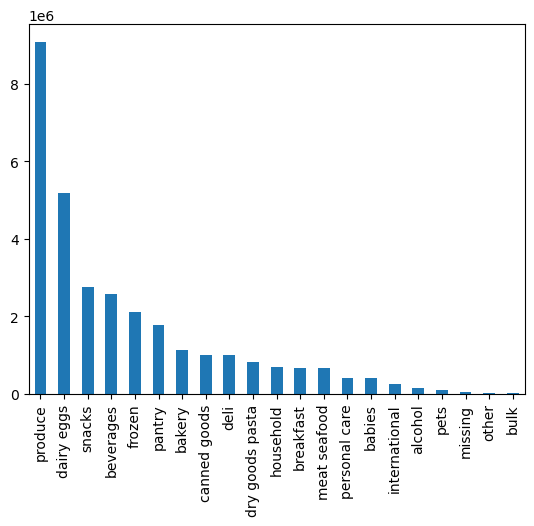

In [71]:
# Creating the bar chart illustrating the popularity of various types of products
dept_bar = ords_prods_final['department'].value_counts().plot.bar()

In [78]:
# Exporting the bar chart illustrating the popularity of various types of products
dept_bar.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Product_popularity.png'))

### 10. Customers' Brand loyalty

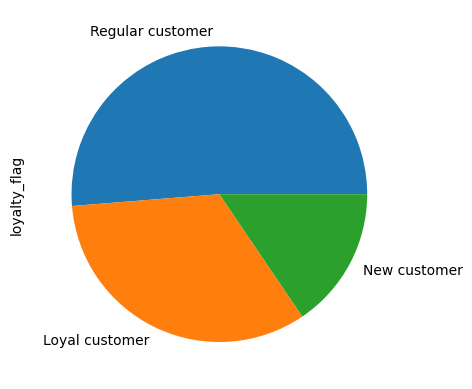

In [72]:
# Creating the pie chart of customers' brand loyalty
customer_loyalty_pie = ords_prods_final['loyalty_flag'].value_counts().plot.pie()

In [80]:
ords_prods_final['loyalty_flag'].value_counts(dropna = False)

Regular customer    15890664
Loyal customer      10293654
New customer         4807692
Name: loyalty_flag, dtype: int64

In [79]:
# Exporting the pie chart of customer loyalty
customer_loyalty_pie.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Customer_loyalty_pie.png'))

### 11. Ordering habits based on customer loyalty

In [82]:
crosstab_loyalty = pd.crosstab(ords_prods_final['loyalty_flag'], ords_prods_final['orders_day_of_week'], dropna = False)

In [83]:
crosstab_loyalty

orders_day_of_week,0,1,2,3,4,5,6
loyalty_flag,,,,,,,
Loyal customer,1756211,1845366,1353628,1267653,1293236,1458089,1319471
New customer,985736,819602,625807,560889,536385,588131,691142
Regular customer,3171784,2751947,2048930,1844307,1798559,1990920,2284217


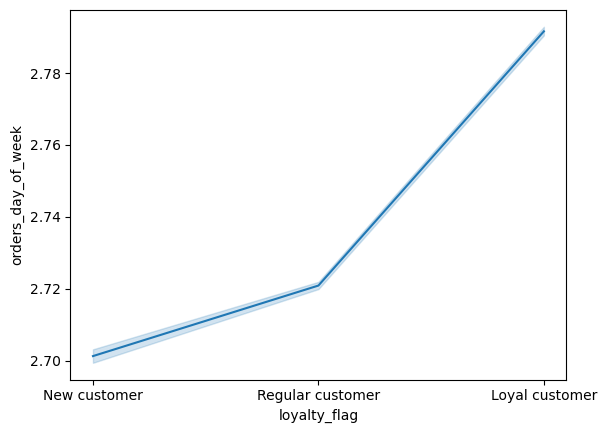

In [84]:
# Creating a line chart of WEEKLY ordering habits based on customer loyalty 
customer_loyalty_lines = sns.lineplot(data = ords_prods_final, x = 'loyalty_flag', y = 'orders_day_of_week')

In [109]:
# Exporting the line chart of WEEKLY ordering habits based on customer loyalty
customer_loyalty_lines.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Customer_loyalty_lineplot.png'))

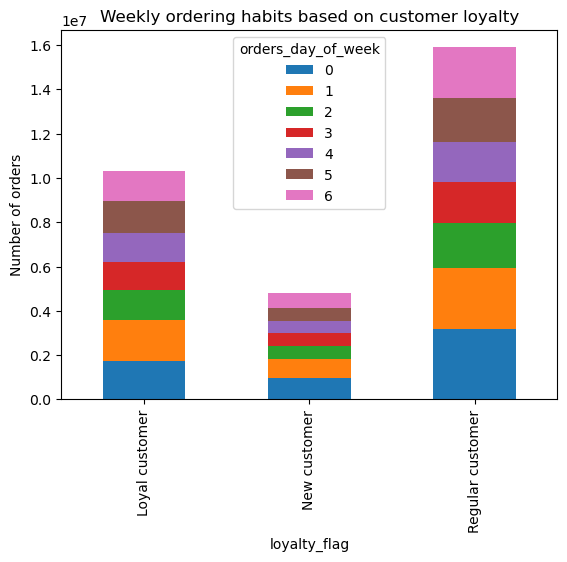

In [111]:
# Creating a stacked bar chart of WEEKLY ordering habits based on customer loyalty 
customer_loyalty_stacked = crosstab_loyalty.plot(kind = 'bar', stacked = True)
plt.xlabel('loyalty_flag')
plt.ylabel('Number of orders')
plt.title('Weekly ordering habits based on customer loyalty')
plt.show()

In [112]:
# Exporting the line chart of WEEKLY ordering habits based on customer loyalty
customer_loyalty_stacked.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Customer_loyalty_stacked_bar.png'))

### 12. Ordering habits based on a customer's region

In [85]:
# Creating a crosstab between region and orders_day_of_week
crosstab_region = pd.crosstab(ords_prods_final['Region'], ords_prods_final['orders_day_of_week'], dropna = False)

In [91]:
crosstab_region

orders_day_of_week,0,1,2,3,4,5,6
Region,,,,,,,
Region_1,1044742,955258,713840,649933,638403,716841,750950
Region_2,1391286,1264871,948197,856061,852216,944062,1010808
Region_3,1957018,1810073,1341570,1230077,1206514,1344038,1430945
Region_4,1520685,1386713,1024758,936778,931047,1032199,1102127


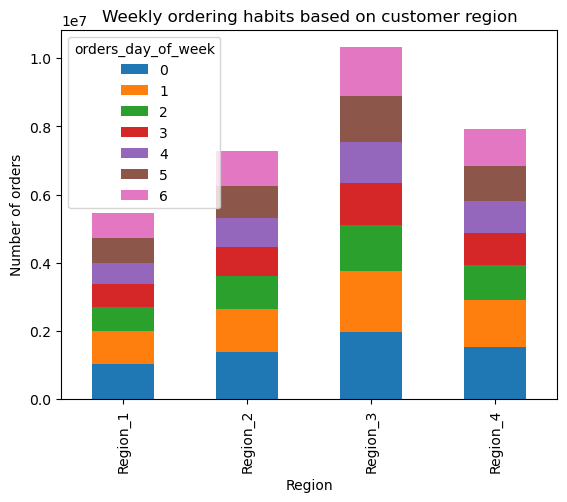

In [114]:
# Creating a stacked bar chart of WEEKLY ordering habits based on customers' region
customer_region_stacked = crosstab_region.plot(kind = 'bar', stacked = True)
plt.xlabel('Region')
plt.ylabel('Number of orders')
plt.title('Weekly ordering habits based on customer region')
plt.show()

In [115]:
# Exporting the stacked bar chart of WEEKLY ordering habits based on customers' region
customer_region_stacked.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Customer_region_stacked_bar.png'))

### 13. Creating Customer Profiles based on age and marital status

Family Profiles:

Young adults with or without dependents

Middle aged people with or without dependents

Senior citizens with or without dependents

In [107]:
def profile(row):
    if row['age_group'] == 'Young Adults' and row['dependent_status'] == 'Has dependents':
        return 'Family with children'
    elif row['age_group'] == 'Young Adults' and row['dependent_status'] == 'No dependents':
        return 'Family without children'
    elif row['age_group'] == 'Middle aged' and row['dependent_status'] == 'Has dependents':
        return 'Middle aged family with children'
    elif row['age_group'] == 'Middle aged' and row['dependent_status'] == 'No dependents':
        return 'Middle aged family without children'
    elif row['age_group'] == 'Senior citizens' and row['dependent_status'] == 'Has dependents':
        return 'Senior citizens with children'
    elif row['age_group'] == 'Senior citizens' and row['dependent_status'] == 'No dependents':
        return 'Senior citizens without children'
    else:
        return 'Not enough information'

In [108]:
ords_prods_final['Family_status'] = ords_prods_final.apply(profile, axis = 1)

In [110]:
ords_prods_final['Family_status'].value_counts(dropna = False)

Middle aged family with children       9092330
Senior citizens with children          7585915
Family with children                   6566920
Middle aged family without children    3031679
Senior citizens without children       2535502
Family without children                2179664
Name: Family_status, dtype: int64

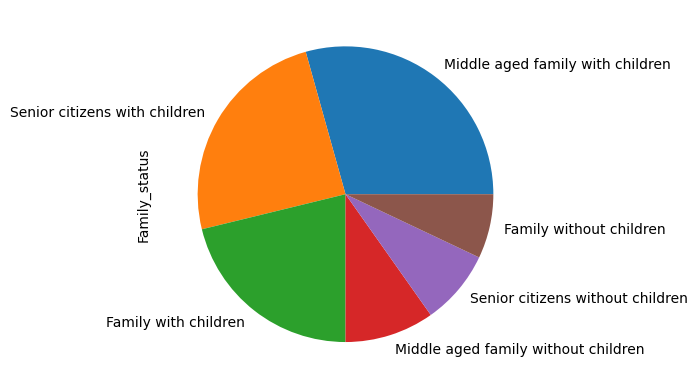

In [126]:
# Creating the pie chart of customers' family status
family_status_pie = ords_prods_final['Family_status'].value_counts().plot.pie()

In [153]:
# Exporting the pie chart of customer family status
family_status_pie.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Family_status_pie.png'))

### 14. Ordering habits based on a customer's age and marital status

In [116]:
# Creating a crosstab between family_status and orders_day_of_week
crosstab_family_status = pd.crosstab(ords_prods_final['Family_status'], ords_prods_final['orders_day_of_week'], dropna = False)

In [117]:
crosstab_family_status

orders_day_of_week,0,1,2,3,4,5,6
Family_status,,,,,,,
Family with children,1260212,1151233,848454,774926,769342,858441,904312
Family without children,411712,396925,279638,256632,258757,279861,296139
Middle aged family with children,1726891,1584391,1191232,1074233,1063875,1178524,1273184
Middle aged family without children,585715,526103,394386,359494,353552,401880,410549
Senior citizens with children,1448201,1317622,985161,905807,888837,985064,1055223
Senior citizens without children,481000,440641,329494,301757,293817,333370,355423


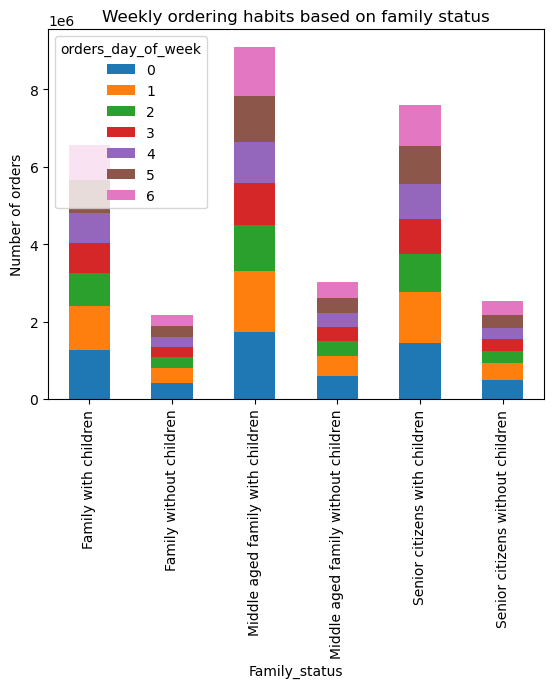

In [118]:
# Creating a stacked bar chart of WEEKLY ordering habits based on family status
family_status_stacked = crosstab_family_status.plot(kind = 'bar', stacked = True)
plt.xlabel('Family_status')
plt.ylabel('Number of orders')
plt.title('Weekly ordering habits based on family status')
plt.show()

In [119]:
# Exporting the stacked bar chart of WEEKLY ordering habits based on family status
family_status_stacked.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Customer_family_status_stacked_bar.png'))

### 15. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [128]:
ords_prods_final.groupby('Family_status').agg({'orders_day_of_week':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

orders_day_of_week             prices  \
                                                  mean min max       mean   
Family_status                                                               
Family with children                          2.736194   0   6   9.942409   
Family without children                       2.723935   0   6   9.595680   
Middle aged family with children              2.747016   0   6   9.889192   
Middle aged family without children           2.731245   0   6   9.384555   
Senior citizens with children                 2.744214   0   6   9.782479   
Senior citizens without children              2.752731   0   6  10.136042   

                                                   
                                     min      max  
Family_status                                      
Family with children                 1.0  14900.0  
Family without children              1.0  14900.0  
Middle aged family with children     1.0  14900.0  
Middle aged family without children  1.0  14900.0  
Senior citizens with children        1.0  14900.0  
Senior citizens without children     1.0  14900.0

### 16. Comparison of customer profiles with regions and departments

In [130]:
# Creating a crosstab between family_status and regions
ct_famstatus_region = pd.crosstab(ords_prods_final['Family_status'], ords_prods_final['Region'], dropna = False)

In [132]:
ct_famstatus_region

Region,Region_1,Region_2,Region_3,Region_4
Family_status,,,,
Family with children,1155292,1528094,2208422,1675112
Family without children,397760,492025,744648,545231
Middle aged family with children,1608792,2151811,3002322,2329405
Middle aged family without children,497399,737010,1000698,796572
Senior citizens with children,1350081,1763175,2525214,1947445
Senior citizens without children,460643,595386,838931,640542


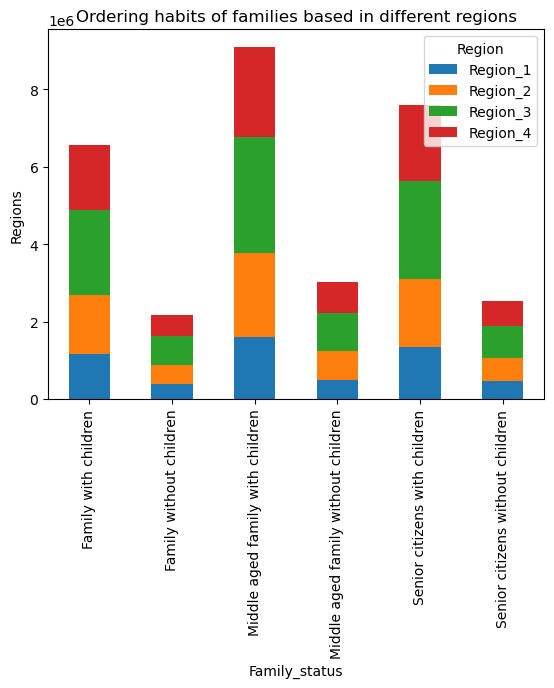

In [138]:
# Creating a stacked bar chart of ordering habits of families based in different regions
regional_orders = ct_famstatus_region.plot(kind = 'bar', stacked = True)
plt.xlabel('Family_status')
plt.ylabel('Regions')
plt.title('Ordering habits of families based in different regions')
plt.show()

In [140]:
# Exporting the stacked bar chart of ordering habits of families based in different regions
regional_orders.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Regional_orders_stacked_bar.png'))

In [148]:
# Creating a crosstab between family_status and departments
ct_famstatus_dept = pd.crosstab(ords_prods_final['Family_status'], ords_prods_final['department'], dropna = False)

In [149]:
ct_famstatus_dept

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Family_status,,,,,,,,,,,,,,,,,,,,,
Family with children,32143,84177,237891,536158,146000,7295,215764,1110158,212622,174498,450987,146731,54311,143225,13939,7405,377539,88561,19647,1917036,590833
Family without children,10246,29288,80332,181240,47466,2329,71415,365353,71241,58083,146506,49222,18602,46167,4807,2541,125364,30166,6783,638358,194155
Middle aged family with children,41480,123051,329429,757296,198767,9784,296623,1515996,291960,242941,621252,207830,75494,198436,19040,9931,524492,127073,27095,2662762,811598
Middle aged family without children,15144,40857,110196,252543,66010,3114,98787,506999,99044,78962,206769,66095,25006,64521,6279,3447,173509,41222,8968,894720,269487
Senior citizens with children,34199,99836,275220,633131,165003,8372,248667,1266992,245870,200401,521354,173939,61725,167245,15854,8361,436906,102546,22721,2224036,673537
Senior citizens without children,11462,33183,91958,211566,54849,2557,80818,425676,83097,67251,176474,56041,20853,55191,4849,2726,145093,34847,7851,742364,226796


In [145]:
# Transposing the crosstab (to improve readability)
ct_dept_famstatus = ct_famstatus_dept.T

In [146]:
ct_dept_famstatus

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Family_status,,,,,,,,,,,,,,,,,,,,,
Family with children,32143,84177,237891,536158,146000,7295,215764,1110158,212622,174498,450987,146731,54311,143225,13939,7405,377539,88561,19647,1917036,590833
Family without children,10246,29288,80332,181240,47466,2329,71415,365353,71241,58083,146506,49222,18602,46167,4807,2541,125364,30166,6783,638358,194155
Middle aged family with children,41480,123051,329429,757296,198767,9784,296623,1515996,291960,242941,621252,207830,75494,198436,19040,9931,524492,127073,27095,2662762,811598
Middle aged family without children,15144,40857,110196,252543,66010,3114,98787,506999,99044,78962,206769,66095,25006,64521,6279,3447,173509,41222,8968,894720,269487
Senior citizens with children,34199,99836,275220,633131,165003,8372,248667,1266992,245870,200401,521354,173939,61725,167245,15854,8361,436906,102546,22721,2224036,673537
Senior citizens without children,11462,33183,91958,211566,54849,2557,80818,425676,83097,67251,176474,56041,20853,55191,4849,2726,145093,34847,7851,742364,226796


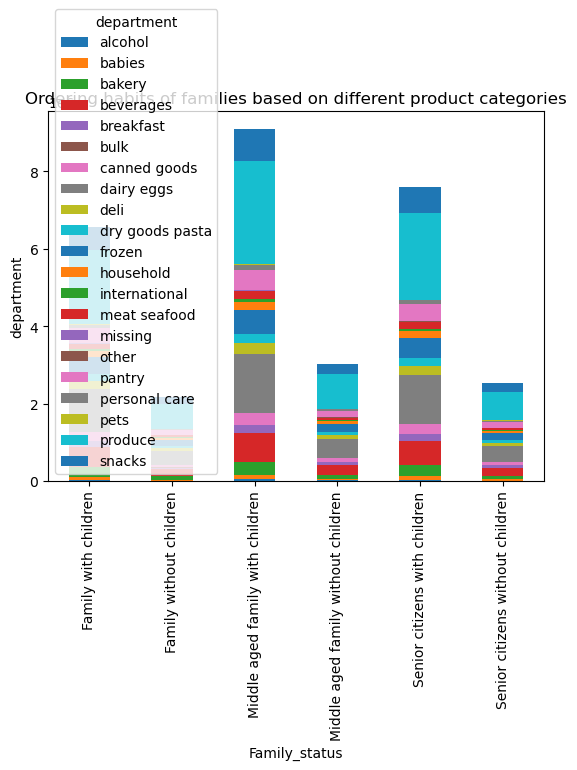

In [151]:
# Creating a stacked bar chart of ordering habits of families based on different product categories
departments_orders = ct_dept_famstatus.plot(kind = 'bar', stacked = True)
plt.xlabel('Family_status')
plt.ylabel('department')
plt.title('Ordering habits of families based on different product categories')
plt.show()

In [152]:
# Exporting the stacked bar chart of ordering habits of families based on different product categories
departments_orders.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', 'Exercise 4.10', '4.10_Departments_orders_stacked_bar.png'))

In [158]:
# Exporting the data set
ords_prods_final.to_pickle(os.path.join(path_name, '02_Data', 'Prepared Data','ords_prods_final.pkl'))